In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data


In [2]:
Y = data.target

In [5]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:

from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y)

In [9]:
Y


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
import numpy as np
np.shape(train_x)

(120, 4)

In [63]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
[
layers.InputLayer(input_shape=(4, ), name='Input_Layer'),
layers.Dense(100, activation="tanh", name="layer1"),
layers.Dense(100, activation="tanh", name="layer2"),
layers.Dense(100, activation='relu',name="layer3"),
 layers.Dense(3,activation='softmax',name='output')
]
)


In [64]:
from tensorflow.keras.optimizers import Adam

In [65]:
model.compile(loss = 'categorical_crossentropy', 
   optimizer = Adam(), 
      metrics = ['accuracy']) 

In [66]:
history = model.fit(train_x, train_y, 
   batch_size = 256, epochs = 400, verbose = 1, validation_data = (test_x, test_y))

Epoch 1/400
1/1 [==============================] - 1s 636ms/step - loss: 1.0907 - accuracy: 0.4000 - val_loss: 0.9415 - val_accuracy: 0.7000
Epoch 2/400
1/1 [==============================] - 0s 32ms/step - loss: 0.9720 - accuracy: 0.6083 - val_loss: 0.8353 - val_accuracy: 0.8667
Epoch 3/400
1/1 [==============================] - 0s 35ms/step - loss: 0.8697 - accuracy: 0.7917 - val_loss: 0.7432 - val_accuracy: 0.8667
Epoch 4/400
1/1 [==============================] - 0s 37ms/step - loss: 0.7829 - accuracy: 0.8167 - val_loss: 0.6641 - val_accuracy: 0.8667
Epoch 5/400
1/1 [==============================] - 0s 34ms/step - loss: 0.7089 - accuracy: 0.8167 - val_loss: 0.5969 - val_accuracy: 0.8667
Epoch 6/400
1/1 [==============================] - 0s 52ms/step - loss: 0.6465 - accuracy: 0.8167 - val_loss: 0.5404 - val_accuracy: 0.8667
Epoch 7/400
1/1 [==============================] - 0s 47ms/step - loss: 0.5937 - accuracy: 0.8167 - val_loss: 0.4928 - val_accuracy: 0.8667
Epoch 8/400
1/1 [==

In [39]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [67]:
from matplotlib import pyplot as plt
def plot_loss(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

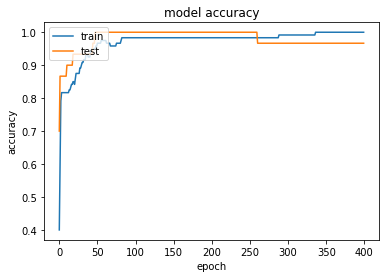

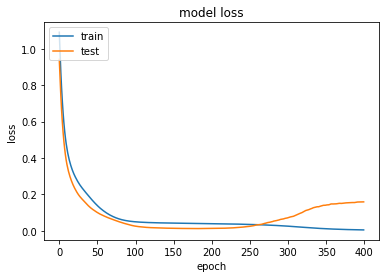

In [68]:
plot_loss(history)

In [73]:
from tensorflow import keras
from tensorflow.keras import layers,regularizers
model2 = keras.Sequential(
[
layers.Dense(4,input_shape=(4, ), 
                
kernel_regularizer=keras.regularizers.l1(0.01)
),
layers.Dense(100, activation="tanh", 
kernel_regularizer=keras.regularizers.l1(0.01)
),
layers.Dense(100, activation="tanh", 
kernel_regularizer=keras.regularizers.l1(0.01)
),
layers.Dense(100, activation='relu',
kernel_regularizer=keras.regularizers.l1(0.01) ),
 layers.Dense(3,activation='softmax',name='output')
 ]
 )


In [74]:
from tensorflow.keras.optimizers import Adam
adam  = Adam(lr=0.01)

In [75]:
model2.compile(loss = 'categorical_crossentropy', 
   optimizer = adam, 
         metrics = ['accuracy']) 

In [76]:
history2 = model2.fit(train_x, train_y, 
   batch_size = 256, epochs = 400, verbose = 1, validation_data = (test_x, test_y))

Epoch 1/400
1/1 [==============================] - 1s 819ms/step - loss: 18.9982 - accuracy: 0.3250 - val_loss: 16.9736 - val_accuracy: 0.8667
Epoch 2/400
1/1 [==============================] - 0s 35ms/step - loss: 16.9836 - accuracy: 0.7917 - val_loss: 15.1477 - val_accuracy: 0.9000
Epoch 3/400
1/1 [==============================] - 0s 39ms/step - loss: 15.1701 - accuracy: 0.7833 - val_loss: 13.4653 - val_accuracy: 0.9000
Epoch 4/400
1/1 [==============================] - 0s 42ms/step - loss: 13.4981 - accuracy: 0.7833 - val_loss: 11.9369 - val_accuracy: 0.8667
Epoch 5/400
1/1 [==============================] - 0s 37ms/step - loss: 11.9770 - accuracy: 0.7917 - val_loss: 10.5334 - val_accuracy: 0.8667
Epoch 6/400
1/1 [==============================] - 0s 34ms/step - loss: 10.5761 - accuracy: 0.8083 - val_loss: 9.2562 - val_accuracy: 0.8667
Epoch 7/400
1/1 [==============================] - 0s 34ms/step - loss: 9.2985 - accuracy: 0.8083 - val_loss: 8.1044 - val_accuracy: 0.8667
Epoch 8/

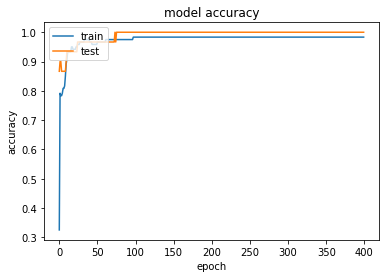

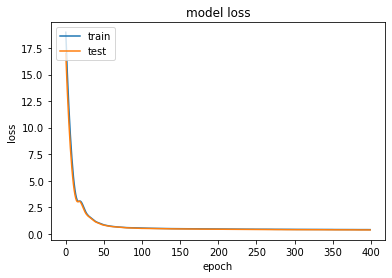

In [77]:
plot_loss(history2)

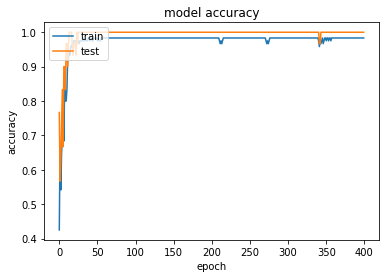

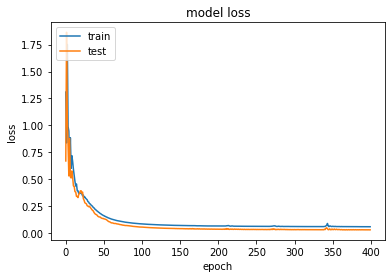

In [78]:
model3 = keras.Sequential(
    [
    layers.Dense(4,input_shape=(4, ), 
                    
                    kernel_regularizer=keras.regularizers.l2(0.001)
                    ),
                    
                    layers.Dense(100, activation="tanh", 
                    kernel_regularizer=keras.regularizers.l2(0.001)
                    ),
                    layers.Dense(100, activation="tanh", 
                    kernel_regularizer=keras.regularizers.l2(0.001)
                    ),
                    layers.Dense(100, activation='relu',
                    kernel_regularizer=keras.regularizers.l2(0.001) ),
                     layers.Dense(3,activation='softmax',name='output')
                      ]
)

model3.compile(loss = 'categorical_crossentropy', 
   optimizer = adam, 
            metrics = ['accuracy']) 
history3 = model3.fit(train_x, train_y, 
   batch_size = 256, epochs = 400, verbose = 0, validation_data = (test_x, test_y))
plot_loss(history3)

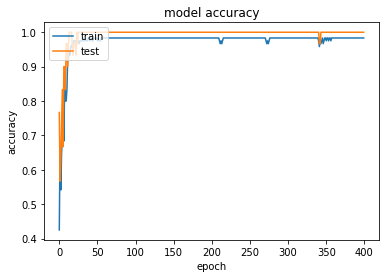

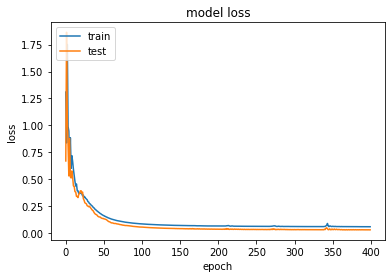

In [81]:
from tensorflow.keras.layers import Dropout

model4 = keras.Sequential(
    [
    layers.Dense(4,input_shape=(4, ), ),
    layers.Dense(100, activation="tanh"),
Dropout(0.4),
    layers.Dense(100, activation="tanh"),
Dropout(0.4),
    layers.Dense(100, activation='relu',),
Dropout(0.4),
    layers.Dense(3,activation='softmax',name='output')
    ]
)
model4.compile(loss = 'categorical_crossentropy', 
   optimizer = adam, 
               metrics = ['accuracy']) 
history4 = model4.fit(train_x, train_y, 
                  batch_size = 256, epochs = 400, verbose = 0, validation_data = (test_x, test_y))
plot_loss(history3)